In [11]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import swan_vis as swan
import yaml
from snakemake.io import expand
import cerberus
import pyranges as pr
from pyfaidx import Fasta
import upsetplot

p = os.path.dirname(os.getcwd())
sys.path.append(p)

from scripts.utils import *
from scripts.vcf_utils import *
from scripts.plotting import *

In [12]:
config = load_config()
od = '../'

def proc_cfg(entry, od):
    entry = entry.replace('../../', '')
    entry = od+entry
    return entry

In [13]:
mt_df = pd.read_csv('../data/05_mastertable/poder_master_table_fixed_genics.tsv', sep='\t')
# mt_df = mt_df.loc[mt_df['filter']=='pass']
mt_df['pop_spec_t'] = (mt_df.population_sharing==1)&\
                      (mt_df.sample_sharing>1)
mt_df['det_pop'] = mt_df[get_population_colors()[1]].idxmax(axis=1)

## What biotypes are population-specific transcripts generally? 

,isoform
associated_gene_biotype,
Novel/Ambiguous Gene,103
Protein Coding,1343
lncRNA,821


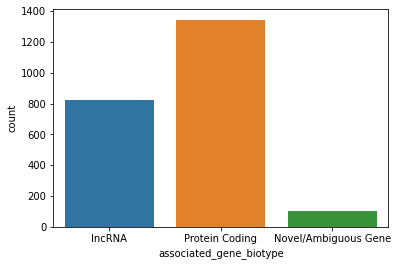

In [10]:
temp = mt_df.loc[mt_df.pop_spec_t==True]
sns.countplot(temp, x='associated_gene_biotype')
temp[['isoform', 'associated_gene_biotype']].groupby('associated_gene_biotype').nunique()

## What's the breakdown of these biotypes per population where the thing was found in ? 

<AxesSubplot:xlabel='det_pop', ylabel='count'>

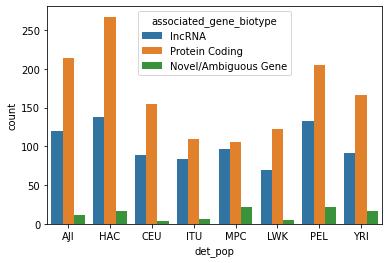

In [9]:
temp = mt_df.loc[mt_df.pop_spec_t==True]
temp = temp[['isoform', 'det_pop', 'associated_gene_biotype']]
sns.countplot(temp, x='det_pop', hue='associated_gene_biotype')

## What structural categories are population-specific transcripts generally? 

,isoform
structural_category,
Antisense,38
FSM,1416
Fusion,33
Genic,3
Intergenic,29
NIC,305
NNC,443


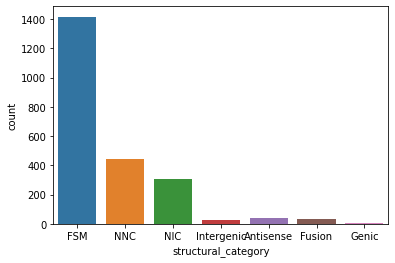

In [14]:
temp = mt_df.loc[mt_df.pop_spec_t==True]
sns.countplot(temp, x='structural_category')
temp[['isoform', 'structural_category']].groupby('structural_category').nunique()

,isoform
novelty,
Known,1416
Novel,851


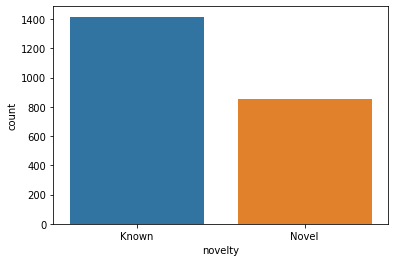

In [16]:
temp = mt_df.loc[mt_df.pop_spec_t==True]
temp['novelty'] = 'Novel'
temp.loc[temp.structural_category=='FSM'] = 'Known'
sns.countplot(temp, x='novelty')
temp[['isoform', 'novelty']].groupby('novelty').count()

In [17]:
851/(851+1416)

0.3753859726510807

In [18]:
851+1416

2267